In [2]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine


查看数据

In [3]:
wine = load_wine()
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [6]:
import pandas as pd
wine = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
wine.columns=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸','target']
wine


,酒精,苹果酸,灰,灰的碱性,镁,总酚,类黄酮,非黄烷类酚类,花青素,颜色强度,色调,od280/od315稀释葡萄酒,脯氨酸,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


数据划分

In [7]:
wine_feature = wine[['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']]
wine_target = wine['target']
# 注意顺序 X X Y Y
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine_feature,wine_target,train_size=0.7)
Xtrain.shape

(124, 13)

建立模型

In [8]:
clf_model = tree.DecisionTreeClassifier(criterion='entropy')
clf_model = clf_model.fit(Xtrain,Ytrain)
score = clf_model.score(Xtest,Ytest) # 返回运行的准确度accuracy
score

0.8333333333333334

图形化决策树

In [9]:
import os
os.environ["PATH"]+=os.pathsep+'D:/Software/Graphviz2.38/bin/'

In [10]:
#feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
#
#import graphviz
#dot_data = tree.export_graphviz(clf_model,
#                                feature_names=feature_name,
#                                class_names=['琴酒','雪莉','贝尔摩德'],
#                                filled=True, # 填充颜色
#                                rounded=True) # 圆角框框
#graph = graphviz.Source(dot_data)
#graph

In [11]:
# 特征重要性
clf_model.feature_importances_

array([0.36141464, 0.        , 0.07111791, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05598083,
       0.0641606 , 0.44732602, 0.        ])

In [12]:
# 查看每个特征的重要性
[*zip(feature_name,clf_model.feature_importances_)] # *解包

NameError: name 'feature_name' is not defined

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30) # random_state=30固定随机次数
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.9259259259259259

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                #   ,splitter="random" 
                                    )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9259259259259259

In [ ]:
#import graphviz
#dot_data = tree.export_graphviz(clf
#                                ,feature_names= feature_name
#                                ,class_names=["琴酒","雪莉","贝尔摩德"]
#                                ,filled=True
#                                ,rounded=True
#                                )
#graph = graphviz.Source(dot_data)
#graph

剪枝参数一共5个

In [ ]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3
                                 #   ,min_samples_leaf=10 # 分枝后最小样本数必须=>10
                                #    ,min_samples_split=25 # 分枝最小样本数必须=>25
                                    )
clf = clf.fit(Xtrain, Ytrain)
#dot_data = tree.export_graphviz(clf
#                                ,feature_names= feature_name
#                                ,class_names=["琴酒","雪莉","贝尔摩德"]
#                                ,filled=True
#                                ,rounded=True
#                                )
#graph = graphviz.Source(dot_data)
#graph

In [ ]:
score = clf.score(Xtest, Ytest)
score

0.9629629629629629

剪枝参数二   
使用循环来画出参数曲线，选择最优参数

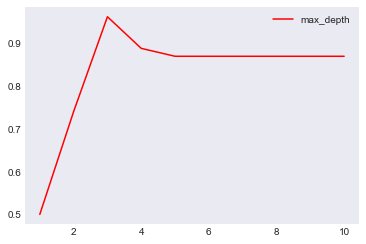

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

一些接口

In [ ]:
clf_model.apply(Xtest) # apply返回每个测试样本所在的叶子节点的索引

array([ 4,  2, 11, 11,  4, 11, 11,  2,  4, 11,  4,  2,  4,  2,  2,  9,  4,
       11,  2,  4, 11,  4, 11,  4,  9,  4, 11,  2,  4,  9,  8,  8,  8,  4,
       11, 11,  2,  2,  4, 11, 11,  4,  8,  4,  4,  4,  4,  8,  4,  9, 11,
        4, 11,  2])

In [ ]:
clf_model.predict(Xtest) # predict返回每个测试样本的分类/回归结果

array([2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 0, 1])

回归决策树

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor,boston.data,boston.target,cv=10,scoring='neg_mean_squared_error')
#交叉验证cross_val_score的用法

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

实例：一维回归的图像绘制

In [8]:
# 可以，讲的很详细，点个赞。就是Y的数据还是太工整了，Y += 0.2 * (0.5 - rng.rand(80)) 会更贴近真实数据一点


In [9]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [10]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
#np.random.rand(数组结构)，生成随机数组的函数


In [11]:

#了解降维函数ravel()的用法
np.random.random((2,1))

np.random.random((2,1)).ravel()

np.random.random((2,1)).ravel().shape

(2,)

In [12]:
y.shape

(80,)

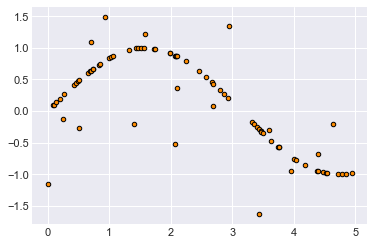

In [13]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

In [14]:
reg1 = DecisionTreeRegressor(max_depth=3)
reg2 = DecisionTreeRegressor(max_depth=5)
reg1.fit(X,y)
reg2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [15]:
# 创建测试集
Xtest = np.arange(0,5,0.01).reshape(500,1)

In [16]:
y1 = reg1.predict(Xtest) # 预测


In [17]:
y2 = reg2.predict(Xtest)

In [18]:
#y2 = reg1.predict([[2.3,]])
#y2

可视化

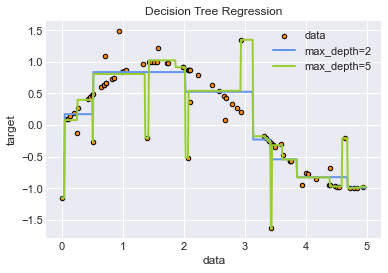

In [19]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(Xtest, y1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(Xtest, y2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

ValueError: x and y must be the same size

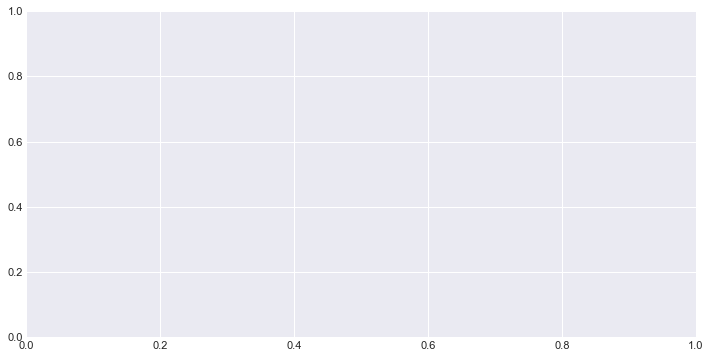

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

fig,axes = plt.subplots(figsize=(12,6))
plt.scatter(Xtest,y,size=20,linewidth=2.0)